## EDA & Data Preprocessing on Google App Store Rating Dataset.

#### Domain: Mobile device apps

## Context:
### The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable. It is important fordevelopers to be able to predict the success of their app and incorporate features which makes an app successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on the apps data available for google app store applications. From the collected apps data and user ratings from  the app stores, let's try to extract insightful information.

## Data set Information:
### Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for category, rating, size, and more.

In [8]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## 1. Import required libraries and read the dataset.

In [9]:
import pandas as pd

# Read the dataset
data1 = pd.read_csv('C:/Users/Admin/Desktop/play_store_apps.csv')
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [10]:
print(data1.head()) # Display the first few rows of the dataset
print(data1.shape)  # Check the shape of the dataset
print(data1.info()) # Get information about the dataset

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [11]:
print("summary statistics of the data ")
data1.describe(include = 'all')

summary statistics of the data 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [12]:
data1.duplicated().sum()  # thier were 483 duplicate valaues
data1.drop_duplicates(inplace=True)

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [13]:
data1.groupby('Category')['Category'].nunique().sum()
data1.isna().sum()  # to find any null values are present
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [14]:
data1['Rating'].isnull().sum()  #1465 missing values are present
data1.dropna(subset=['Rating'], inplace=True)
# data['Rating_category'] = data['Rating']


data1['Rating_category'] = data1['Rating'].apply(lambda i: 'High' if i > 3.5 else 'Low')
# data["Rating_category"] = np.where(data["Rating"] > 3.5, 'High', 'Low')
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

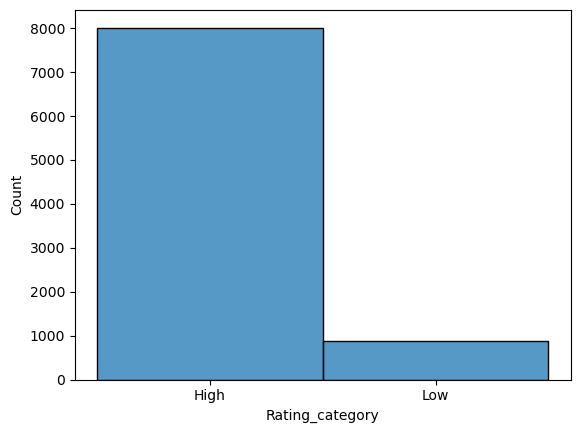

In [15]:
# df1_data1['Rating_category']

sns.histplot(x ='Rating_category', data = data1)

plt.show()

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

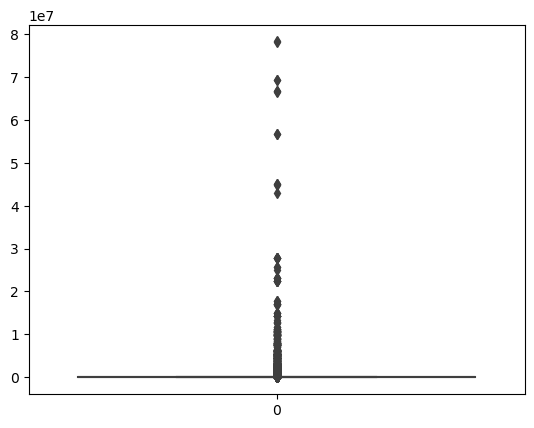

In [16]:
data1['Reviews'] = pd.to_numeric(data1['Reviews'], errors="coerce")

sns.boxplot(data1['Reviews'].dropna())
plt.show()

# their are outliers

In [17]:
# handle the outliers using a transformation approach.(Hint: Use log transformation)


data1['Reviews_log'] = np.log(data1['Reviews'])
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High,1.386294
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High,4.736198


### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [18]:
data1['Size'] = data1['Size'].replace({'M':'1000000','K':'1000','k':'1000'},regex = True)

data1 = data1[data1['Size'] != 'Varies with device']
data1
data1['Size'] = data1['Size'].replace({'1,000+':'1000'})
data1['Size'] = pd.to_numeric(data1['Size'])
data1['Size'].dtype

dtype('float64')

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [19]:
data1['Installs'] = data1['Installs'].str.replace(',', '').str.replace('+', '')
data1['Installs'] = data1['Installs'].str.replace(r'\D', '')

In [20]:
data1['Installs'] = pd.to_numeric(data1['Installs'])

In [21]:
data1['Installs'].dtype

dtype('float64')

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [22]:
data1['Price'] = data1['Price'].str.replace('$', '').str.replace(',', '')

data1['Price'] = pd.to_numeric(data1['Price'], errors='coerce')
data1.dropna(inplace=True)

In [23]:
data1['Price'].dtype

dtype('float64')

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [24]:
data1.drop(['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [25]:
data1

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159.0,1.910000e+08,10000.0,Free,0.0,Everyone,High,5.068904
1,ART_AND_DESIGN,967.0,1.410000e+08,500000.0,Free,0.0,Everyone,High,6.874198
2,ART_AND_DESIGN,87510.0,8.710000e+00,5000000.0,Free,0.0,Everyone,High,11.379508
3,ART_AND_DESIGN,215644.0,2.510000e+08,50000000.0,Free,0.0,Teen,High,12.281384
4,ART_AND_DESIGN,967.0,2.810000e+00,100000.0,Free,0.0,Everyone,High,6.874198
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,44.0,6.191000e+06,1000.0,Free,0.0,Everyone,High,3.784190
10834,FAMILY,7.0,2.610000e+00,500.0,Free,0.0,Everyone,High,1.945910
10836,FAMILY,38.0,5.310000e+08,5000.0,Free,0.0,Everyone,High,3.637586
10837,FAMILY,4.0,3.610000e+00,100.0,Free,0.0,Everyone,High,1.386294


### 13. Encode the categorical columns.

In [26]:
le=LabelEncoder()

data1['Category']=le.fit_transform(data1['Category'])
data1['Type']=le.fit_transform(data1['Type'])
data1['Content Rating']=le.fit_transform(data1['Content Rating'])
data1['Rating_category']=le.fit_transform(data1['Rating_category'])


In [27]:
data1.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,0,159.0,1.910000e+08,10000.0,0,0.0,1,0,5.068904
1,0,967.0,1.410000e+08,500000.0,0,0.0,1,0,6.874198
2,0,87510.0,8.710000e+00,5000000.0,0,0.0,1,0,11.379508
3,0,215644.0,2.510000e+08,50000000.0,0,0.0,4,0,12.281384
4,0,967.0,2.810000e+00,100000.0,0,0.0,1,0,6.874198


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [28]:
Y = data1['Rating_category']
X = data1.drop(['Rating_category'],axis = 1)

In [29]:
Y.shape,X.shape

((7418,), (7418, 8))

### 15. Split the dataset into train and test.

In [30]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

In [31]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5192, 8), (2226, 8), (5192,), (2226,))

### 16. Standardize the data, so that the values are within a particular range.

In [32]:
ss = StandardScaler()
X_train_Scaled = ss.fit_transform(X_train)
X_train_Scaled = ss.fit_transform(X_test)